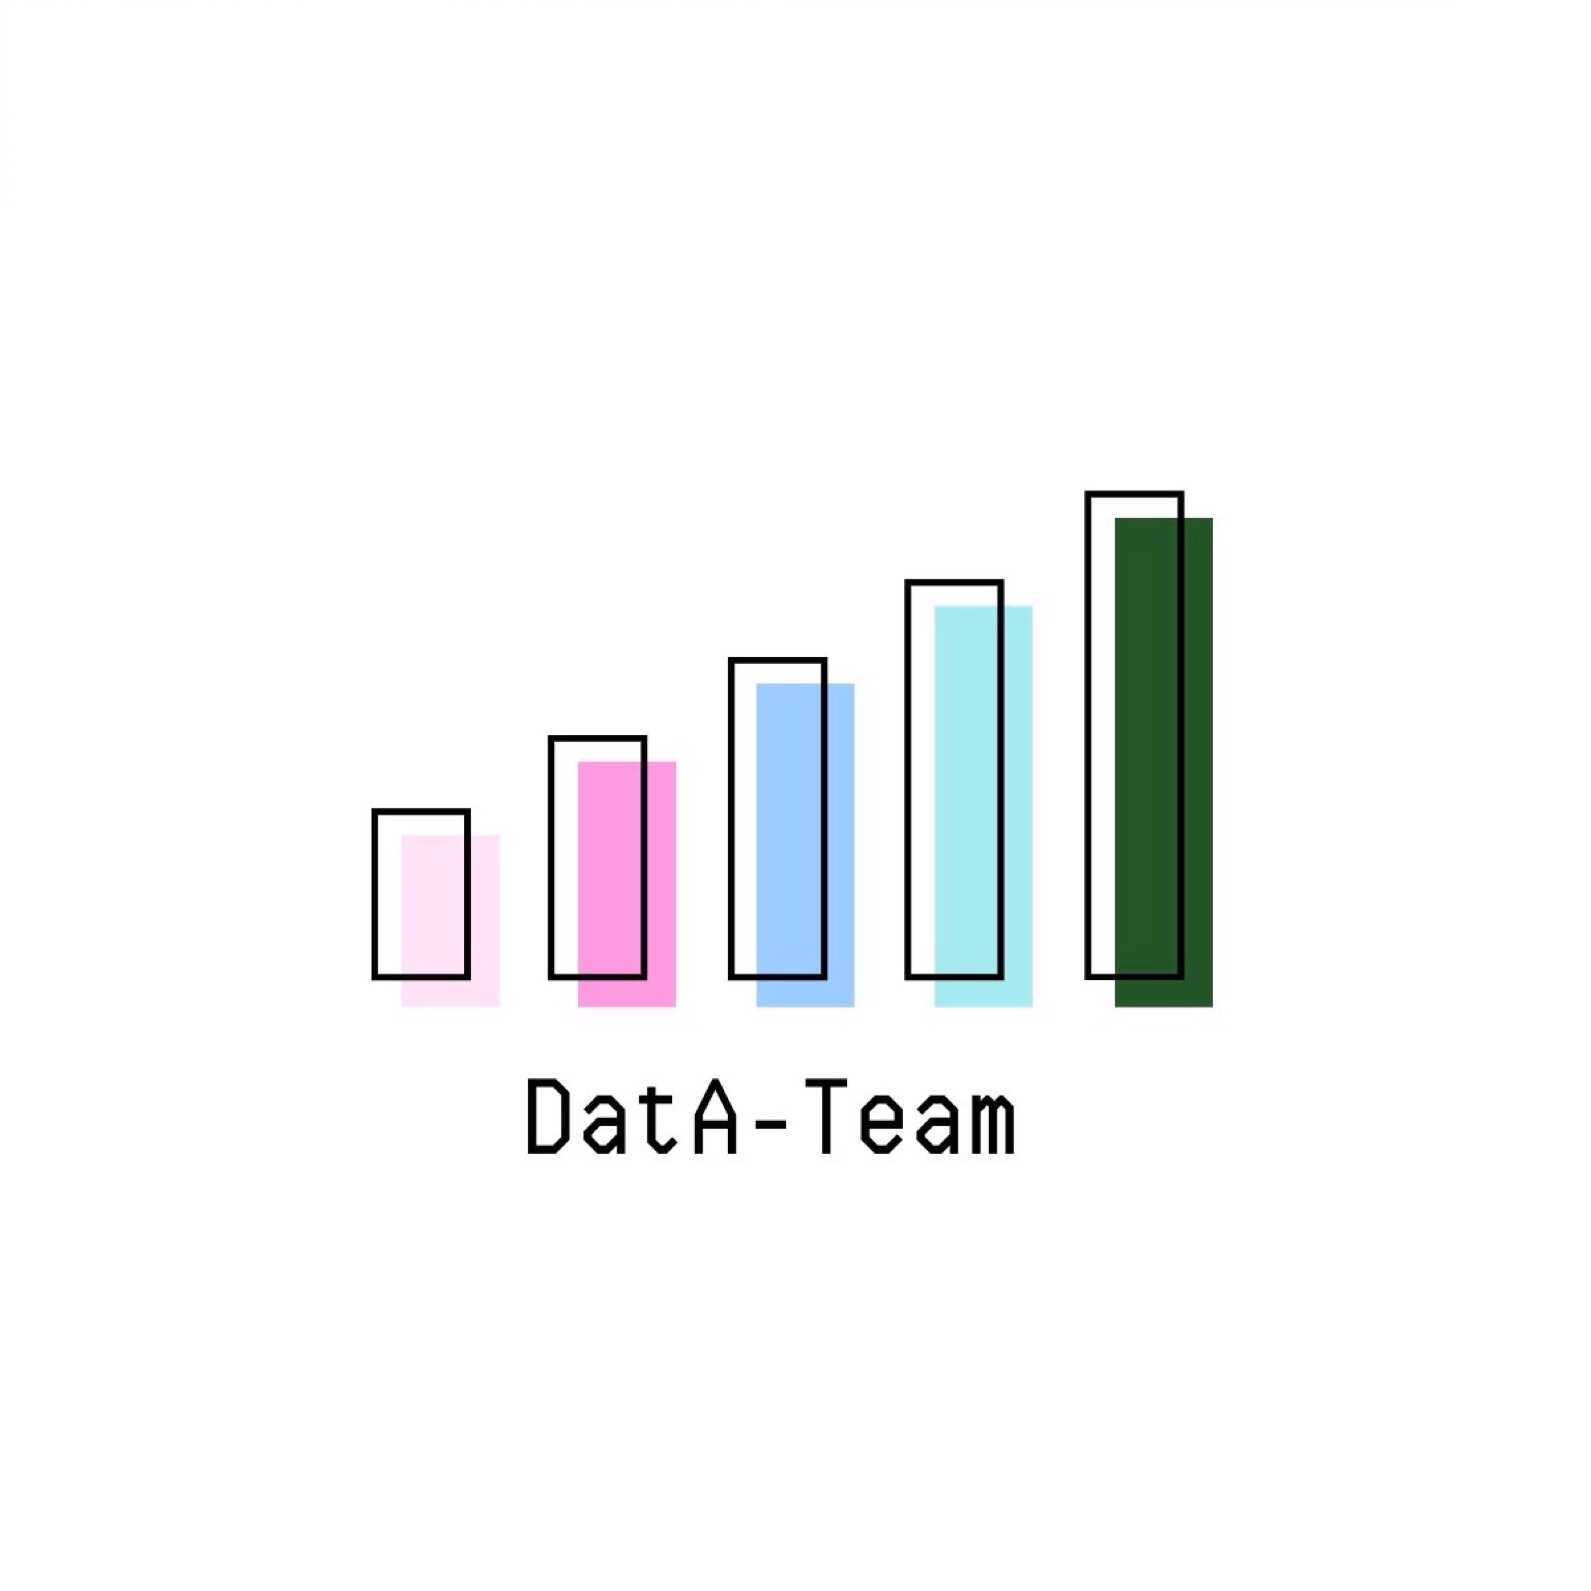

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

display.Image("./IMG_3022.jpg", width=400)

# Uber eats

## Spis treści /do uzupełnienia na razie tu lista do zrobienia
- Czyszczenie NaNów
- Statystyki opisowe (średnie, mediany, max, min, odchylenia standardowe)
- Analiza geograficzna
- Korelacje
- Wizualizacja
- Prezentacja

## Opis /do uzupełnienia na razie pomysły na koncepcję biznesową
* Otwarcie nowej restauracji
* Wybranie restauracji z którymi zakończyć współpracę
* Konkurs na najlepszą restaurację
* Najlepsze menu - gdzie zamawiamy sobie jedzenie na weekend
* Pokrycie restauracjami geograficznie

## Dane

In [2]:
restaurants = pd.read_csv('restaurants.csv')
menus = pd.read_csv('restaurant-menus.csv')
merged = restaurants.merge(menus, how='left', left_on='id', right_on='restaurant_id' , sort=False, suffixes=('_rest', '_menu'))

In [3]:
restaurants.describe()

,id,position,score,ratings,lat,lng
count,40227.000000,40227.000000,22254.000000,22254.000000,40227.000000,40227.000000
mean,20114.000000,79.529843,4.560996,74.870989,39.927033,-96.549713
std,11612.678976,77.611449,0.298041,72.381529,5.765774,17.961361
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,10057.500000,14.000000,4.400000,25.000000,37.082007,-113.587301
50%,20114.000000,51.000000,4.600000,51.000000,39.000990,-96.587547
75%,30170.500000,129.000000,4.800000,100.000000,45.493640,-77.528825
max,40227.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [4]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40227 entries, 0 to 40226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40227 non-null  int64  
 1   position      40227 non-null  int64  
 2   name          40227 non-null  object 
 3   score         22254 non-null  float64
 4   ratings       22254 non-null  float64
 5   category      40204 non-null  object 
 6   price_range   33581 non-null  object 
 7   full_address  39949 non-null  object 
 8   zip_code      39940 non-null  object 
 9   lat           40227 non-null  float64
 10  lng           40227 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.4+ MB


In [5]:
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [7]:
restaurants.tail()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110
40226,40227,50,Beijing Wok,4.4,254.0,"Chinese, Asian, Asian Fusion, Family Friendly,...",$,"8106 Brodie Ln, Austin, TX, 78749",78749,30.202210,-97.838689


In [8]:
menus.describe()

,restaurant_id
count,3.375211e+06
mean,1.991793e+04
std,1.126081e+04
min,1.000000e+00
25%,1.015800e+04
50%,1.980000e+04
75%,2.888500e+04
max,4.022700e+04


In [9]:
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375211 entries, 0 to 3375210
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 128.8+ MB


In [10]:
menus.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


menus.tail()

In [11]:
merged.head(3)

,id,position,name_rest,score,ratings,category_rest,price_range,full_address,zip_code,lat,lng,restaurant_id,category_menu,name_menu,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD


In [12]:
restaurants.groupby('price_range')["id"].count()

price_range
$       24385
$$       9029
$$$       149
$$$$       18
Name: id, dtype: int64

## Czyszczenie danych

In [13]:
#dodanie kolumny 'state' z kodów pocztowych; nadanie kodu pocztowego 00000 dla błędnych kodów
restaurants['state'] = [str(a).replace(str(b), '').strip()[-3:-1] for a, b in zip(restaurants['full_address'], restaurants['zip_code'])]
restaurants.loc[restaurants['zip_code'].str.len() == 2, ['zip_code']] = '00000'
restaurants.loc[restaurants['zip_code'].isin(['75070']), ['state']] = 'TX'
restaurants.loc[restaurants['state'].isin([', ','an','U']),['state']] = 'PR'

In [14]:
restaurants['state'].unique()

array(['AL', '', 'WY', 'WI', 'MN', 'IL', 'WV', 'OH', 'WA', 'OR', 'PR',
       'ID', 'VA', 'DC', 'MD', 'TN', 'VT', 'UT', 'AM', 'TX'], dtype=object)

In [22]:
restaurants[restaurants['state']=='']

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state
110,111,124,Post Office Pies (Avondale),4.6,32.0,"Pizza, American, Italian",$,NaN,NaN,33.52467,-86.77390,
129,130,100,Urban Cookhouse (Birmingham),4.8,19.0,"American, Sandwich, Salads",NaN,NaN,NaN,33.51668,-86.81039,
143,144,80,Godfather's Pizza (231 State Farm Pkwy),4.9,16.0,"Pizza, American, Italian",$$,NaN,NaN,33.44629,-86.82708,
584,585,35,It's Just Wings (3083 Montgomery Highway),3.7,31.0,"American, Wings",$$,NaN,NaN,31.25078,-85.42848,
899,900,1,Five Guys AL- 4062 5413 US 280,NaN,NaN,"American, Burgers",$,NaN,NaN,33.24693,-86.33891,
...,...,...,...,...,...,...,...,...,...,...,...,...
39274,39275,183,Memo’s tacos,NaN,NaN,"Mexican, Latin American, New Mexican",$$,NaN,NaN,33.00313,-97.22769,
39303,39304,36,"Qdoba (1521 Keller Parkway, Suite 700)",NaN,NaN,"Dinner, Mexican, Burritos, Tacos",$,NaN,NaN,32.93468,-97.21780,
39465,39466,98,Asian Kitchen,NaN,NaN,"Chinese, Asian, Asian Fusion",NaN,NaN,NaN,30.33749,-97.69273,
39629,39630,280,Fish &amp; Rice Poke Bar,NaN,NaN,"Asian, Asian Fusion, Korean",$,NaN,NaN,30.33537,-97.72005,


In [15]:
restaurants.groupby('state')['id'].count().sort_values(ascending=False)

state
VA    9264
WA    8894
TX    7273
WI    4317
UT    3085
DC    1511
WV    1379
AL    1107
OR    1024
MD     895
VT     347
WY     319
       278
IL     204
PR     199
MN      43
TN      42
ID      27
OH      15
AM       4
Name: id, dtype: int64

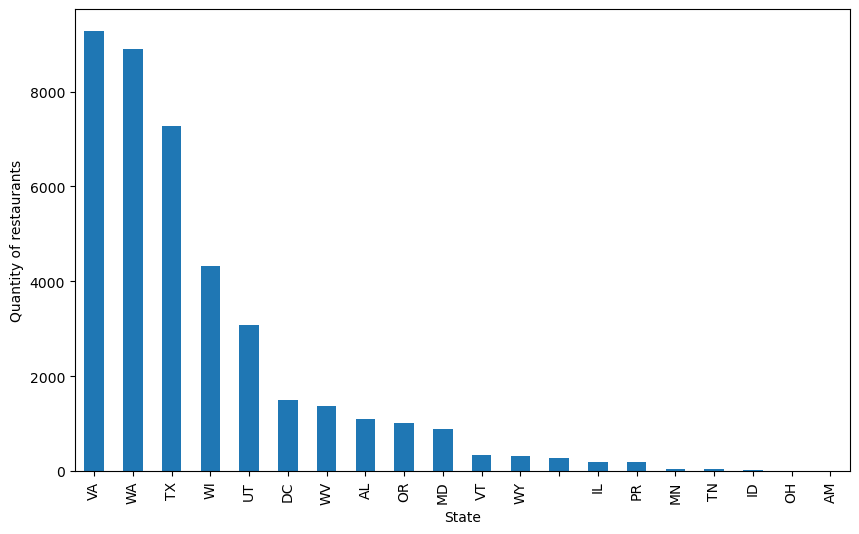

In [16]:
restaurants.groupby('state')['id'].count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,6), ylabel="Quantity of restaurants", xlabel="State");

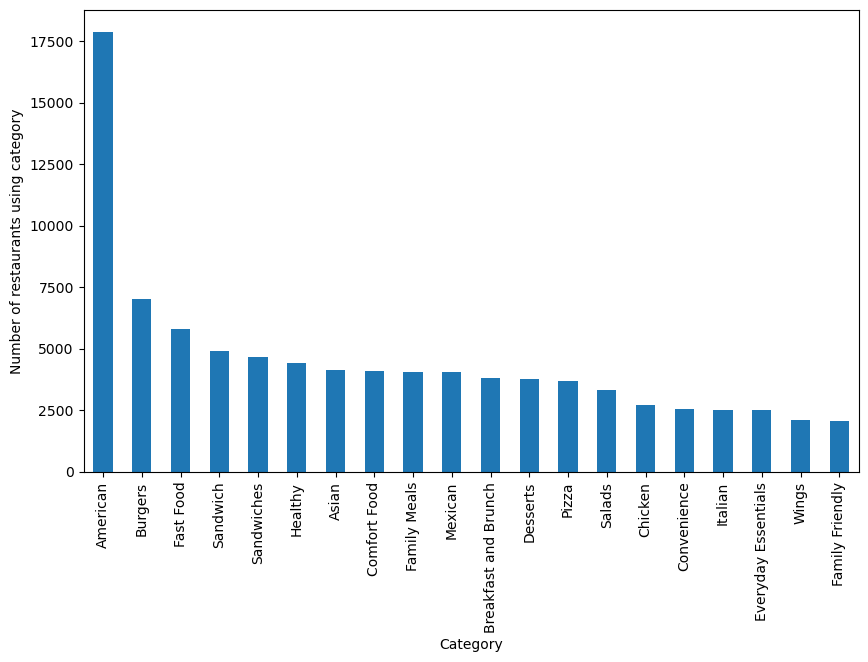

In [18]:
categories = pd.DataFrame(restaurants['category'].str.split(','), index=restaurants['id'])
categories = categories.explode('category')
categories = categories.apply(lambda x: x.str.strip())
categories.groupby(['category'])['category'].count().sort_values(ascending = False).head(20)\
.plot(kind='bar', figsize=(10,6), ylabel="Number of restaurants using category", xlabel="Category");

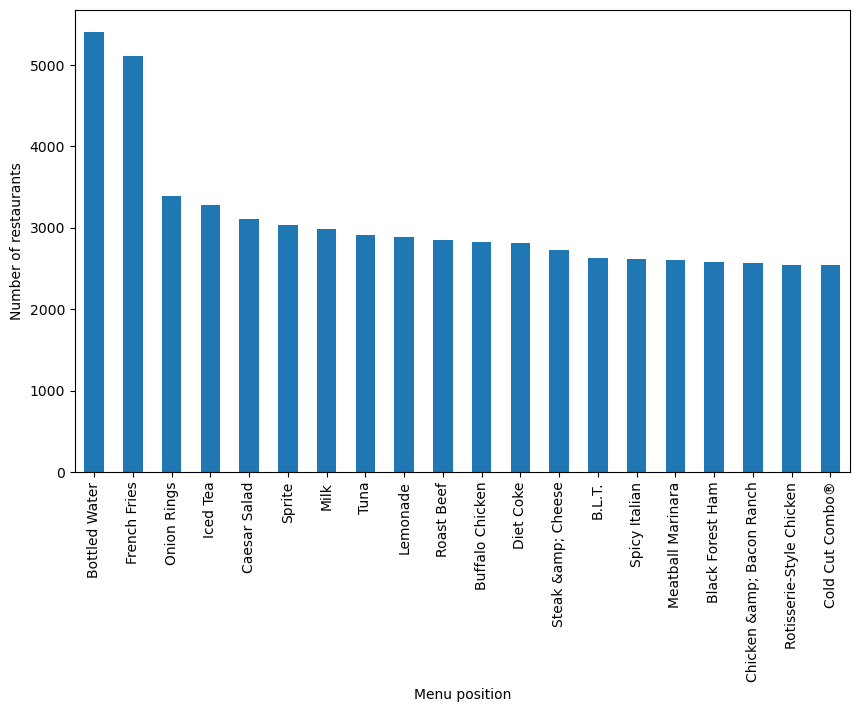

In [19]:
menus.groupby(['name'])['name'].count().sort_values(ascending=False).head(20)\
.plot(kind='bar', figsize=(10,6), ylabel="Number of restaurants", xlabel="Menu position");

In [104]:
category_range = pd.DataFrame([restaurants['category'].str.split(','), restaurants['price_range']]).T
category_range = category_range.explode('category')
category_range = category_range.apply(lambda x: x.str.strip())
category_range = category_range.groupby(['price_range','category'], group_keys=True)['category'].count().sort_values(ascending=False)

### Najczęstsze kategorie z uwzględnieniem półki cenowej

In [105]:
category_range.head(30)

price_range  category                
$            American                    11081
             Fast Food                    5192
$$           American                     4615
$            Burgers                      3906
             Sandwich                     3493
             Healthy                      3096
             Family Meals                 2755
             Pizza                        2531
             Mexican                      2485
             Convenience                  2458
             Everyday Essentials          2419
             Sandwiches                   2362
             Desserts                     2334
             Comfort Food                 2271
$$           Burgers                      2246
$            Breakfast and Brunch         2213
             Asian                        2211
             Salads                       1856
             Snacks                       1847
             Chicken                      1712
$$           Sandwiche

### Najrzadsze kategorie z uwzględnieniem półki cenowej

In [106]:
category_range.tail(30)

price_range  category                        
$$$          Brazilian                           1
             Burritos                            1
             Cafe                                1
$$           Otsumami                            1
             Other                               1
             Bistro                              1
             Egyptian                            1
             Burmese                             1
             ButcherShop                         1
             Cambodian                           1
             Chinese Food                        1
             Chinese: Noodles &amp; Dumplings    1
             Colombian                           1
             Cuban                               1
             Dominican                           1
             Dount                               1
             Dumpling House                      1
             Empanada                            1
             OrganicProducts        